In [1]:
import pandas as pd
from pylab import *
from tb_DataReader import EventFeaturesReader
from tb_PulseAmpFitter import PulseAmpFitter

%matplotlib inline
dataDir = "../data/eventFeatures"

Welcome to JupyROOT 6.16/00


In [2]:
run,backend="230","ubcm"
rd = EventFeaturesReader(dataDir,"000"+run,backend)

# 1. Fit Data

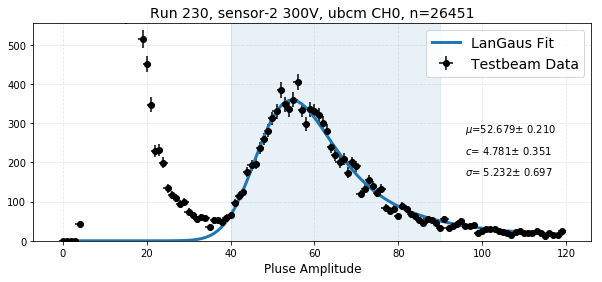

 FCN=28.0389 FROM MIGRAD    STATUS=CONVERGED     529 CALLS         530 TOTAL
                     EDM=6.64218e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  LandauWidth   4.78098e+00   3.51169e-01   4.03402e-04  -5.08916e-03
   2  LandauMPV    5.26785e+01   2.09668e-01   6.06970e-04   1.26907e-03
   3  Normalisation   2.21824e+03   3.15809e+02   9.00856e-02   1.01429e-05
   4  GaussianSigma   5.23179e+00   6.97303e-01   2.34495e-04   1.86324e-03
                               ERR DEF= 0.5


In [3]:
channel = 0
ch = rd.getChannel(channel)
title = "Run {}, sensor-{} {}V, {} CH{}, n={}".format(run,2, 300,backend,channel,len(ch))
# fitting
fitter = PulseAmpFitter(ch.pulseAmp)
fitter.fitRange(40,90)
# plot
fitter.plot()
plt.title(title, fontsize=14)
plt.savefig("../plots/pulseAmpFit/langaus_{}_run{}_{}.png".format(backend,run,channel),dpi=300)

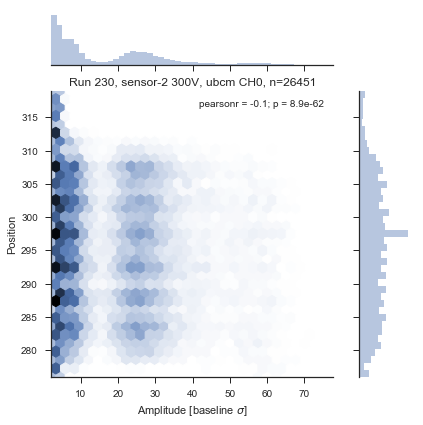

In [4]:
import seaborn as sns
sns.set(style="ticks")
jp= sns.jointplot(ch.pulseAmp_sigmaNoise, ch.pulsePos, kind="hex", color="C0",gridsize=30,ratio=4,space=0.5)
jp.set_axis_labels(r'Amplitude [baseline $\sigma$]','Position')
#jp.ax_joint.plot([0,100])
jp.ax_joint.set_title(title)
plt.savefig("../plots/PulseHist2D/{}_run{}_{}.png".format(backend,run,channel),dpi=300)